<h1><center>LUNG CANCER IMAGE CLASSIFICATION</center></h1>

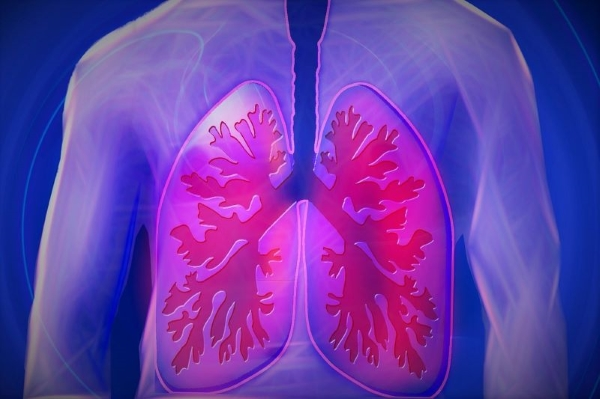

## EXECUTIVE SUMMARY

## TABLE OF CONTENTS
* [INTRODUCTION](#introduction)
* [METHODOLOGY](#methodology)
    * [INSTALLING AND IMPORTING LIBRARIES](#installing_importing_libraries)
    * [DATA COLLECTION](#data_collection)
    * [DATA PREPROCESSING](#data_preprocessing)
    * [MODEL CREATION](#model_creation) 
    * [MODEL EVALUATION](#model_evaluation)
* [DISCUSSION](#discussion)
* [CONCLUSION](#conclusion)
* [REFERENCES](#references)
* [APPENDIX](#appendix)

## INTRODUCTION <a class="anchor" id="introduction"></a>

**Problem Statement: To create machine learning models to detect if someone could have lung cancer using X-Ray images.**

## METHODOLOGY <a class="anchor" id="methodology"></a>

1. [Installing and importing libraries](#installing_importing_libraries) - The required libraries were installed and imported.
2. [Data Collection](#data_collection) - The lung cancer dataset was downloaded from [here](https://data.mendeley.com/datasets/bhmdr45bh2/1) as a zip file. After the zip file was extracted, the **Bengin cases**, **Malignant cases** and **Normal cases** directories were renamed to **benign**, **malignant** and **normal** respectively.The renamed directories were then copied to the **data** directory of this project.
3. [Data Preprocessing](#data_preprocessing) - The image files in the **benign**, **malignant** and **normal** directories (located in the **data** directory of this project) were opened using the **Pillow** library and then converted to **NumPy** arrays for creating the models.
5. [Model Creation](#model_creation) - A **class** representing several machine learning models was created, which was then used to create the models.
6. [Model Evaluation](#model_evaluation) -

### INSTALLING AND IMPORTING LIBRARIES <a class="anchor" id="installing_importing_libraries"></a>

**The required libraries were installed.**

The command to install packages/libraries are: **! pip install [library]** 

The following libraries were installed: **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, **Pillow** and **Pickle**.

In [1]:
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install pillow
! pip install pickle

**The required libraries were imported.**

For this project, the only external libraries that were required were: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn, Pillow and Pickle. Some standard libraries were also imported.

In [97]:
import os  # For interacting with the operating system e.g. checking if a file exists and listing the contents of a directory.
import sys # For terminating the program.

from PIL import Image # Library for image manipulation.

import numpy as np # Library for utlizing high performance arrays.
import pandas as pd # Library for data cleaning, manipulation and analysis.

from sklearn.preprocessing import StandardScaler # For data standardization.
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets.
from sklearn.model_selection import GridSearchCV # For determining the best hyperparameters of the models.
from sklearn.metrics import accuracy_score # For determining the accuracy of the model.

from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbor (KNN) Model.
from sklearn.linear_model import LogisticRegression # Logistic Regression Model.
from sklearn.ensemble import RandomForestClassifier # Random Forest Model.
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron (MLP) Model.

import pickle # For saving and laoding the models.

### DATA COLLECTION <a class="anchor" id="data_collection"></a>

The lung cancer dataset was downloaded from [here](https://data.mendeley.com/datasets/bhmdr45bh2/1) as a zip file. After extracting the zip file, a directory called "The IQ-OTHNCCD lung cancer dataset" was created.

The contents of the "The IQ-OTHNCCD lung cancer dataset" directory were as follows:
* **Bengin cases**
* **Malignant cases**
* **Normal cases**
* **IQ-OTH_NCCD lung cancer dataset.txt**

The "IQ-OTH_NCCD lung cancer dataset.txt" is a text file containing a description of the dataset.

The **Bengin cases**, **Malignant cases** and **Normal cases** directories were renamed to **benign**, **malignant** and **normal** respectively.

The renamed directories were then copied to the **data** directory of this project.

Also, the renamed directories would be used as **labels** for the images.

### DATA PREPROCESSING <a class="anchor" id="data_preprocessing"></a>

The image files for this project would be stored in the **data** directory in this project.

In [98]:
base_path = 'data' # Path where the image files are located.

The names of the subdirectories in the **data** directory (i.e. **benign**, **malignant** and **normal**) were extracted and stored in a list. These names would be used as labels for the images.

In [99]:
if os.path.exists(base_path): # Checks if the base path exist.
    content = os.listdir(base_path) # Stores the content of the path in a list.
    
    categorical_labels = [] # List to store the categorical labels.
    
    if content: # Checks if there are any elements in the "content" list.
        for item in content: # Iterates through each item in the "content" list.
            if item.endswith(''): # Checks if the item does not have a file extension.
                categorical_labels.append(item) # Appends the item to the "categorical_labels" list.
            else:
                print(f'\"{item}\" is not a directory.') # Displays a message stating that the item is not a directory.
    else:
        print('The f"{base_path}" directory is empty.') # Displays a message that the path to store the image files is empty.
        print('Program terminated...') # Displays a message stating that the program is terminated.
        sys.exit() # Terminates the program.
else:
    print(f'The \"{base_path}\" directory does not exist.') # Displays a message stating that the base path does not exist.
    print('Program terminated...\n') # Displays a message stating that the program is terminated.
    sys.exit() # Terminates the program.

Since the machine learning models cannot accept categorical (text) labels, it was converted into **numerical** labels.

A dictionary was created to store the categorical labels with the corresponding **numerical** labels.

In [100]:
labels = {} # Dictionary to store the categoricaL labels with the corresponding numerical labels.

# Iterates through each index and value in the "categorical_labels" list.
for numerical_label, categorical_label in enumerate(categorical_labels): 
    # Stores the categorical label and the numerical label in the "labels" dictionary.
    labels[categorical_label] = numerical_label 

# Displays a message stating the categorical and numerical labels.
print('The categorical labels with their corresponding numerical labels are as follows:\n')
# Iterates through each categorical label and the numerical label in the "labels" dictionary.
for categorical_label, numerical_label in labels.items():  
    # Displays the categorical label with it's corresponding numerical label.
    print(f'{categorical_label}: {numerical_label}') 

The categorical labels with their corresponding numerical labels are as follows:

benign: 0
malignant: 1
normal: 2


A CSV file containing the categorical labels and numerical labels was created and saved in the **input** directory.

In [108]:
categorical_labels = labels.keys() # Stores the categorical labels in a list.
numerical_labels = labels.values() # Stores the numerical labels in a list.
# Creates a dictionary to store the "categorical_labels" list and the "numerical_labels" list.
labels_dict = {'categorical_label': categorical_labels, 'numerical_label': numerical_labels}

labels_df = pd.DataFrame(labels_dict) # Creates a Pandas DataFrame from the "labels_dict" dictionary.
labels_df.to_csv('input/labels.csv', index=False) # Saves the Pandas DataFrame as a CSV file in the specified directory.

The paths of each file in the **benign**, **malignant** and **normal** directories were extracted and stored in 3 lists.

A dictionary was created to store the lists with the corresponding labels.

In [109]:
files = {} # Dictionary to store the lists of the files with the corresponding label.

for label in labels: # Iterates through each label in the "labels" dictionary.
    path = os.path.join(base_path, label) # Joins the base path with the label.
    content = os.listdir(path) # Stores the content of the path in a list.
    files[label] = [] # List to store the path of the image files for that label.
    for file in content: # Iterates through each filename.
        filename = os.path.join(path, file) # Joins the path with the filename.
        files[label].append(filename) # Appends  the path of the file to the list in the dictionary.

The image files for each label (i.e. **benign**, **malignant** and **normal**) was opened and its content was converted into  **NumPy** arrays.

A dictionary was created to store the lists of NumPy arrays with the corresponding label.

In [7]:
data = {} # Dictionary to store the image files as numpy arrays.

for label, content in files.items(): # Iterates through each label and the list of files in the "files" dictionary.
    data[label] = [] # List to store the image files as numpy arrays, for that label.
    for file in content: # Iterates through each file path for that label.
        if file.endswith('.png') or file.endswith('.jpg'): # Checks if the file path ends with a PNG or JPG file extension.
            img = Image.open(file) # Opens the image file.
            numpy_data = np.asarray(img) # Converts the image file to a numpy array.
            data[label].append(numpy_data) # Stores the numpy data of the image in the list.
        else:
            # Displays a message stating that the file does not end with a PNG or JPG file extension.
            print(f'{file} does not end with a PNG or JPG file extension.')
            continue # Skips the current iteration.

All of the image NumPy arrays were **resized** to the same dimensions (width and height) for the model creation.

A dictionary was created to store the lists of resized NumPy arrays with the corresponding label.

In [117]:
data_resized = {} # Dictionary to store the reszied image files as numpy arrays.
 
height = 32 # Resized image height (in pixels).
width = 32 # Resized image width (in pixels).

for label, numpy_arrays in data.items(): # Iterates through each label and the list of numpy arrays.
    data_resized[label] = [] # List to store the resized numpy array for that label.
    for numpy_array in numpy_arrays: # Iterates through each image numpy array for the label.
        # Resizes the image numpy array to the specified height and width, with 3 color channels (i.e. Red, Green and Blue)
        resized_image = np.resize(numpy_array, (height, width, 3)) 
        data_resized[label].append(resized_image) # Appends the resized image numpy array to the list.

All of the image NumPy arrays and their corresponding numerical labels were **appended** to separate lists (one list for the features and the other list for the labels).

The list containing the features was converted into a multi-dimensional NumPy array and then **reshaped** into a 2 dimensional array.

The list containing the labels was converted into a single dimensional NumPy array.

In [120]:
input_values = [] # List to store all the combined numpy arrays for the input values.
output_values = [] # List to store all the output values (numerical labels).

# Iterates  through each label with the corresponding list of resized numpy arrays.
for label, numpy_arrays_resized in data_resized.items(): 
    input_values += numpy_arrays_resized # Appends each resized image numpy array to the "input_values" list. 
    # Determines te numerical label, creates a list to store the amount of numerical lables for that label, and appends the list to the "output_values" list.
    output_values += len(numpy_arrays_resized) * [labels[label]] 
    
X_numpy_arrays = np.asarray(input_values) # Converts the "input_values" list into a mult-dimensional numpy array.

X = [] # List to store the features.
number_columns_X = height * width * 3 # Number of columns for X.
for X_numpy_array in X_numpy_arrays: # Iterates through each element in the "X_numpy_arrays" list.
    # Reshapes the multi-dimensional numpy array into a 2 dimensional numpy array for the features and then appends it to the "X" list.
    X.append(np.reshape(X_numpy_array, (number_columns_X,))) 

y = np.asarray(output_values) # Converts the "output_values" list into a single dimension numpy array.

print(f'Shape of X: {np.shape(X)}') # Displays the shape of the "X" numpy array.
print(f'Shape of Y: {np.shape(y)}') # Displays the shape of the "y" numpy array.

Shape of X: (1097, 3072)
Shape of Y: (1097,)


### MODEL CREATION <a class="anchor" id="model_creation">

A **class** was created to represent 4 classification models:
* K-Nearest Neighbors (KNN)
* Logistic Regression
* Random Forest
* Multilayer Perceptron (MLP)

The hyperparameters of each model were tuned using the **GridSearchCV** object to increase the accuracy.

In [131]:
class ClassificationModels:
    '''Class representing different classification models.'''
    def __init__(self, X, y):
        '''Initializes the features (X) and the target (y), as well as other attributes.'''
        self.X = X # Features
        self.y = y # Target
        
        self.accuracies = {} # Dictionary to store the accuracy of the models.
        self.best_hyperparameters = {} # Dictionary to store the best hyperparameters for the models.
    
    def standardize_data(self):
        '''Standardizes the features by removing the mean and scaling to unit variance.'''
        scaler = StandardScaler() # Creates a StandardScaler object for data standardization.
        self.X = scaler.fit_transform(self.X) # Fits the features to the StandardScaler object, and returns the scaled data.
        
    def split_data(self):
        '''Splits the data into training and testing sets.'''
        # Split the data into training and testing sets with a test size of 20%, and a random state of 2.
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=2)
        
    def logistic_regression_model(self):
        '''Creates and fit a Logistic Regression model using GridSearchCV.'''
        # Logisitic Regression parameters for determining best hyperparameters.
        parameters = {'C': [0.01,0.1,1], 
                      'penalty': ['l2'], 
                      'solver': ['lbfgs'], 
                      'max_iter': [10000]}
        
        logistic_regression_model = LogisticRegression() # Creates a Logistic Regression model.

        # Creates a GridSearchCV object with the Logistic Regression model and its parameters, with 10 cross validations.
        self.logistic_regression_cv = GridSearchCV(logistic_regression_model, parameters, scoring='accuracy', cv=10) 
        self.logistic_regression_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.

        # Calculates the accuracy of the model using the test data, and store it in the "accuracies" dictionary.
        self.accuracies['Logistic Regression'] = self.logistic_regression_cv.score(self.X_test, self.y_test) 
        # Stores the best hyperparemters of the model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['Logistic Regression'] = self.logistic_regression_cv.best_params_
       
    def random_forest_model(self):
        '''Creates and fit a Random Forest model using GridSearchCV.'''
        # Random Forest parameters for determining best hyperparemeters.
        parameters = {'bootstrap': [True, False], 
                      'max_depth': [10, 50, 100], 
                      'max_features': ['auto', 'sqrt'], 
                      'min_samples_leaf': [1, 2, 4], 
                      'min_samples_split': [2, 5, 10],
                      'n_estimators': [100, 500, 1000]}
        
        random_forest_model = RandomForestClassifier() # Creates a Random Forest model.
        
        # Creates a GridSearchCV object with the Random Forest model and its parameters, with 10 cross validations.
        self.random_forest_cv = GridSearchCV(random_forest_model, parameters, scoring='accuracy', cv=10)
        self.random_forest_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        # Calculates the accuracy of the model using the test data, and store it in the "accuracies" dictionary.
        self.accuracies['Random Forest'] = self.random_forest_cv.score(self.X_test, self.y_test)
        # Stores the best hyperparameters of the model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['Random Forest'] = self.random_forest_cv.best_params_
    
    def knn_model(self):
        '''Creates and fits a K-Nearest Neighbors (KNN) model using GridSearchCV.'''
        # KNN Parameters for determining best hyperparameters.
        parameters = {'n_neighbors': list(range(1, 11)), 
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                      'p': [1,2]}
        
        knn_model = KNeighborsClassifier() # Creates a KNN model.
        # Creates a GridSearchCV object with the KNN model and its parameters, with 10 cross validations.
        self.knn_cv = GridSearchCV(knn_model, parameters, scoring='accuracy', cv=10)
        self.knn_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        # Calculates the accuracies of the model using the test data, and store it in the "accuracies" dictionary.
        self.accuracies['KNN'] = self.knn_cv.score(self.X_test, self.y_test)
        # Stores the best hyperparameters of the KNN model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['KNN'] = self.knn_cv.best_params_
                                  
    def mlp_model(self):
        '''Creates and fits a Multilayer Perceptron (MLP) model using GridSearchCV.'''
        # MLP Parameters for determining best hyperparameters.
        parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                      'activation': ['tanh', 'relu'],
                      'solver': ['sgd', 'adam'],
                      'alpha': [0.0001, 0.05, 0.1],
                      'learning_rate': ['constant','adaptive']}
        
        mlp_model = MLPClassifier(max_iter=100) # Creates a MLP model with 100 iterations (epochs).
        # Creates a GridSearchCV object with the MLP model and its parameters, with 10 cross validations.
        self.mlp_cv = GridSearchCV(mlp_model, parameters, scoring='accuracy', cv=10)
        self.mlp_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        # Calculates the accuracies of the model using the test data, and store it in the "accuracies" dictionary.
        self.accuracies['MLP'] = self.mlp_cv.score(self.X_test, self.y_test)
        # Stores the best hyperparameters of the MLP model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['MLP'] = self.mlp_cv.best_params_

An instance of the **ClassificationModels** class was created for model development and training.

In [132]:
models = ClassificationModels(X,y) # Creates an instance of the ClassificationModels class for model development and training.

The **features (X)** was standardized using a **StandardScaler** object, which removes the mean and scales to unit variance.

In [141]:
models.standardize_data() # Standardizes the data using the StandardScaler object.

The data was split into **training** and **testing** sets using the **split_data** method.
80% of the data wil be used for training and 20% of the data will be used for testing.

In [142]:
models.split_data() # Splits the data into training and testing sets.

A **K-Nearest Neighbor (KNN)** model was created using the data.

In [135]:
models.knn_model() # Creates and trains a KNN model.

A **Logistic Regression** model was created using the data.

In [139]:
models.logistic_regression_model() # Creates and trains a Logistic Regression model.

A **Random Forest** model was created using the data.

In [ ]:
# The Random Forest model takes a very long time to train.
# If you want to create the Random Forest model, uncomment the below line.
# models.random_forest_model() # Creates and trains a Random Forest model.

A **Multlayer Perceptron** model was created using the data.

In [89]:
models.mlp_model() # Creates and trains a Multilayer Perceptron model.

C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dehos\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [140]:
print(models.accuracies)

{'KNN': 0.8409090909090909, 'Logistic Regression': 0.9409090909090909}


### MODEL EVALUATION <a class="anchor" id="model_evaluation">

## DISCUSSION <a class="anchor" id="discussion">

**Precautions:**

**Limitations:**


## CONCLUSION <a class="anchor" id="conclusion">

## REFERENCES<a class="anchor" id="references">

[1] <a class="anchor" id="1"></a> 

[2] <a class="anchor" id="2"></a> 

## APPENDIX<a class="anchor" id="appendix">